In [113]:
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

의사결정 트리(Decision Tree)
데이터 분류 및 회귀에 사용되는 지도 학습 알고리즘으로 가장 큰 장점은 결과값이 어떻게 나왔는지 이해하기가 가장 쉽다는 것이다. 또한 높은 정확도도 장점이다. 하지만 과대적합되기 쉬운 알고리즘이다.
***
의사결정 트리 알고리즘은 스무고개와 비슷하다. 데이터의 특징을 바탕으로 데이터를 연속적으로 분리하다 보면 결국 하나의 정답으로 데이터를 분류할 수 있는데 스무고개에서 적은 질문으로 정답을 맞추기 위해 의미있는 질문을 먼저 하는 것이 중요하듯이 의사 결정 트리에서도 의미있는 질문을 먼저 하는 것이 상당히 중요하다. 데이터의 특징 속에서 분류에 큰 영향을 끼치는 특징을 발견하고 상위 노드를 선택하는 것이 의사결정 트리 알고리즘의 핵심이다.
***
스무고개를 할 때 질문자는 질문을 하나 던질 때마다 약간씩의 정보를 획득한다. 약간씩의 정보를 획득하는 과정은 정답에 대한 불확실성이 조금씩 줄어든다는 것과 같은 개념이다. 정보 이론(Information Theory)에서는 이 불확실성을 수치적으로 표현한 값을 엔트로피(Entropy)라고 표현하며 정보 이득(Information gain)은 질문 이전의 엔트로피에서 질문 후의 엔트로피를 뺀 값이 된다. 즉, 불확실성이 줄어든 정도를 정보 이득이라고 한다.
***
지니 계수(Gini Index)
p ** 2 + Q ** 2으로 계산하며 불순도를 측정하는 지표로 데이터의 통계적 분산정도를 정량화해서 표현한 것을 의미한다.
사이킷런의 의사결정 트리는 CART(Classification And Regression Tree) 타입의 의사결정 트리이며 CART는 트리의 노드마드 특징을 이진 분류하는 특징이 있기에 사이킷런은 의사결정 트리를 구성할 때 지니 계수를 사용한다.

문제 정의
서울 지역(구)의 위도와 경도 정보를 학습해서 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류하는 모델을 구현한다.
즉, 특정 지역이 강동구인지 강서구인지 아니면 강남구인지 알아내는 모델을 구한다.

데이터 획득
district: 구, dong: 동, latitude: 위도, longitude: 경도, label: 강동, 강서, 강남, 강북으로 구분한 지역

In [114]:
district_dict_list = [
   {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
   {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
   {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
   {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
   {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
   
   {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
   {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
   {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
   {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
   {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},

   {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
   {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
   {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
   {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
   {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},

   {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
   {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
   {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
   {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
   {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
      ]

dong_dict_list = [
   {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
   {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
   {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
   {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
   {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
   
   {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
   {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
   {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
   {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
   {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},

   {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
   {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
   {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
   {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
   {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},

   {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
   {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
   {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
   {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
   {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
      ]

In [115]:
train_df = pd.DataFrame(district_dict_list)
train_df.head()

district   latitude   longitude    label
0    Gangseo-gu  37.551000  126.849500  Gangseo
1  Yangcheon-gu  37.524240  126.855396  Gangseo
2       Guro-gu  37.495400  126.887400  Gangseo
3  Geumcheon-gu  37.451900  126.902000  Gangseo
4       Mapo-gu  37.560229  126.908728  Gangseo

In [116]:
test_df = pd.DataFrame(dong_dict_list)
test_df.head()

dong   latitude   longitude    label
0  Gaebong-dong  37.489853  126.854547  Gangseo
1   Gochuk-dong  37.501394  126.859245  Gangseo
2   Hwagok-dong  37.537759  126.847951  Gangseo
3  Banghwa-dong  37.575817  126.815719  Gangseo
4   Sangam-dong  37.577039  126.891620  Gangseo

In [117]:
# 학습데이터와 테스트 데이터의 분포를 확인한다.
print('train_df.label')
print(train_df['label'].value_counts())
# 테스트 데이터의 레이블은 강남, 강북, 강서, 강동으로 총 4개의 값으로 5개씩 일정한 양으로 분포되어 있음을 확인할 수 있다.
print('train_df.label')
print(train_df.label.value_counts())


train_df.label
Gangseo     5
Gangbuk     5
Gangdong    5
Gangnam     5
Name: label, dtype: int64
train_df.label
Gangseo     5
Gangbuk     5
Gangdong    5
Gangnam     5
Name: label, dtype: int64


학습 데이터 시각화

In [118]:
plt.figure(figsize=[12, 8])
sns.lmplot(data=train_df, x='longitude', y='latitude', fit_reg=False, hue='label', markers=['o', 'x', '*', 's'], scatter_kws={'s': 80})
plt.title('district visualization in 2D plane')
plt.show()

<Figure size 864x576 with 0 Axes>

데이터 전처리
위의 시각화를 통해 구 이름과 동 이름이 학습이나 테스트에 별 영향을 미치지 않는다는 점을 알았으므로 학습 및 테스트에 필요없는 특징(피쳐)을 데이터에서 제거한다.

In [119]:
# train_df.drop('district', axis=1, inplace=True)
train_df

district   latitude   longitude     label
0      Gangseo-gu  37.551000  126.849500   Gangseo
1    Yangcheon-gu  37.524240  126.855396   Gangseo
2         Guro-gu  37.495400  126.887400   Gangseo
3    Geumcheon-gu  37.451900  126.902000   Gangseo
4         Mapo-gu  37.560229  126.908728   Gangseo
5       Gwanak-gu  37.487517  126.915065   Gangnam
6      Dongjak-gu  37.512400  126.939300   Gangnam
7       Seocho-gu  37.483700  127.032400   Gangnam
8      Gangnam-gu  37.517200  127.047300   Gangnam
9       Songpa-gu  37.503510  127.117898   Gangnam
10     Yongsan-gu  37.532561  127.008605   Gangbuk
11      Jongro-gu  37.573000  126.979400   Gangbuk
12    Seongbuk-gu  37.603979  127.056344   Gangbuk
13       Nowon-gu  37.654200  127.056800   Gangbuk
14      Dobong-gu  37.668800  127.047100   Gangbuk
15   Seongdong-gu  37.557340  127.041667  Gangdong
16  Dongdaemun-gu  37.575759  127.025288  Gangdong
17    Gwangjin-gu  37.557562  127.083467  Gangdong
18    Gangdong-gu  37.554194  127.151405  Gangdong
19    Jungrang-gu  37.593684  127.090384  Gangdong

In [120]:
# test_df.drop('dong', axis=1, inplace=True) # 테스트 데이터에서 동 제거
test_df

dong   latitude   longitude     label
0       Gaebong-dong  37.489853  126.854547   Gangseo
1        Gochuk-dong  37.501394  126.859245   Gangseo
2        Hwagok-dong  37.537759  126.847951   Gangseo
3       Banghwa-dong  37.575817  126.815719   Gangseo
4        Sangam-dong  37.577039  126.891620   Gangseo
5       Nonhyun-dong  37.508838  127.030720   Gangnam
6        Daechi-dong  37.501163  127.057193   Gangnam
7        Seocho-dong  37.486401  127.018281   Gangnam
8       Bangbae-dong  37.483279  126.988194   Gangnam
9         Dogok-dong  37.492896  127.043159   Gangnam
10  Pyoungchang-dong  37.612129  126.975724   Gangbuk
11      Sungbuk-dong  37.597916  126.998067   Gangbuk
12    Ssangmoon-dong  37.648094  127.030421   Gangbuk
13           Ui-dong  37.648446  127.011396   Gangbuk
14    Samcheong-dong  37.591109  126.980488   Gangbuk
15      Hwayang-dong  37.544234  127.071648  Gangdong
16          Gui-dong  37.543757  127.086803  Gangdong
17        Neung-dong  37.553102  127.080248  Gangdong
18         Amsa-dong  37.552370  127.127124  Gangdong
19       Chunho-dong  37.547436  127.137382  Gangdong

In [130]:
from sklearn import tree # 사이킷런의 의사결정 트리를 사용하기 위해 import 한다.
from sklearn import preprocessing # LabelEncoder() 함수를 사용하기 위해 import한다.
from sklearn.metrics import accuracy_score

모델 학습
사이킷런의 의사결정 트리를 로드해서 학습시킨다.

In [122]:
X_train = train_df[['longitude', 'latitude']]
Y_train = train_df[['label']]
X_test = test_df[['longitude', 'latitude']]
Y_test = test_df[['label']]

In [123]:
# sklearn.preprocessing에 포함된 LabelEncoder() 함수는 데이터를 모델화시키고 학습을 시키기 위해서 숫자로 만든다.
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(Y_train)
print(y_encoded)
# classes_: LabelEncoder() 함수로 숫자로 변환한 원래 라벨 데이터
print(le.classes_)

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]
['Gangbuk' 'Gangdong' 'Gangnam' 'Gangseo']


In [124]:
# DesicionTreeClassifier() 함수로 의사결정 트리를 학습시킨다.
# DecisionTree의 내부 알고리즘 구동시 random하게 특성들과 데이터 건수를 선택하는 로직이 포함되어 있기 때문에 random_state로 특정 값을 지정하며 DecisionTree 수행시마다 동일한 rule의 트리를 만들 수 있도록 한다.
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)

학습된 의사결정 트리를 시각화하는 함수

In [125]:
def display_decision_surface(clf, x, y):
    x_min = x.longitude.min() - 0.01
    x_max = x.longitude.max() + 0.01
    y_min = x.latitude.min() - 0.01
    y_max = x.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    print(n_classes)
    plot_color = 'rywb'
    plot_step = 0.001
    
    # meshgrid(): 좌표 벡터에서 좌표 행렬을 반환한다.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    
    # predict(): 학습 결과에 따른 예측을 한다.
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print(Z)
    Z = Z.reshape(xx.shape)
    print('type: {}'.format(type(Z)))
    print('shape: {}, dimemsion: {}, dtype: {}'.format(Z.shape, Z.ndim, Z.dtype))
    print('Array Data: \n', Z)
    
    # 등고선차트
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_color):
        # print(i, color)
        # np.where(): 조건에 맞는 값의 색인 위치를 찾는다.
        idx = np.where(y == i)
        # print(idx)
        plt.scatter(x=x.loc[idx].longitude, y=x.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.Pastel1, edgecolors='black', s=50)
    
    plt.title('Decision surface of a decision tree', fontsize=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=14)
    plt.xlabel('longitude', fontsize=14) # x축 제목
    plt.ylabel('latitude', fontsize=14) # y축 제목
    
    plt.rcParams['figure.figsize'] = [7, 5] # 차트 크기
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    plt.show()

4
[3 3 3 ... 1 1 1]
type: <class 'numpy.ndarray'>
shape: (237, 322), dimemsion: 2, dtype: int32
Array Data: 
 [[3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 ...
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]]


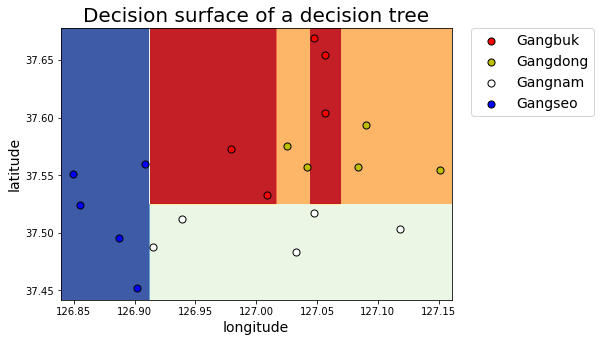

In [126]:
display_decision_surface(clf, X_train, y_encoded)

의사결정의 트리는 과대적합되기 쉬운 모델이다.
사이킷런의 의사결정 트리는 과대적합을 피할 수 있도록 별도의 파라미터를 제공하는데 파라미터를 설정하지 않을 경우 모델은 학습되지만 과대적합될 가능성이 높다.

In [127]:
# 과대적합을 피하기 위한 파라미터를 설정해서 학습한다.
# max_depth: 트리의 최대 깊이
# min_samples_split: 자식 노드를 가지기 위한 최소한의 데이터 개수
# min_samples_leaf: 리트 노드의 최소 데이터 개수
clf = tree.DecisionTreeClassifier(
    random_state=35,
    max_depth=4, # 과대적합을 방지하려면 max_depth 파라미터를 지정해주는 것이 좋다.
    min_samples_split=2,
    min_samples_leaf=2
    ).fit(X_train, y_encoded)
display_decision_surface(clf, X_train, y_encoded)

4
[3 3 3 ... 1 1 1]
type: <class 'numpy.ndarray'>
shape: (237, 322), dimemsion: 2, dtype: int32
Array Data: 
 [[3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 ...
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]]


의사결정 트리 시각화
graphviz를 사용하려면 아래와 같은 과정을 먼저 실행해야 한다.
- https://graphviz.org/download/ 에서 graphviz 설치파일(exe)을 다운받아 설치한다.
- path 환경변수에 C:\Program Files\Graphviz\bin 을 추가한다.
- conda install graphviz와 같이 설치가 안 되는 모듈은 pip install graphviz로 설치한다.

In [128]:
# ! pip install graphviz
import graphviz

In [129]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['longitude', 'latitude'], class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('seoul') # 랜더링된 의사결정 트리를 pdf 파일로 저장한다.
graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

모델 테스트

In [131]:
predict = clf.predict(X_test) # 모델 정확도를 예측한다.
print(predict)
print('정확도: ' + str(accuracy_score(Y_test.values.ravel(), le.classes_[predict])))

TypeError: accuracy_score() missing 1 required positional argument: 'y_pred'

In [ ]:
comparison = pd.DataFrame({'예측값' : le.classes_[predict], '실제값' : Y_test.values.ravel()})

임의의 데이터 테스트

In [133]:
district_dict_list = [
   {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
   {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
   {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
   {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
   {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
]

test_df = pd.DataFrame(dong_dict_list)
X_test = test_df[['longitude', 'latitude']]
Y_test = test_df[['label']]

In [ ]:
# 임의의 데이터에 대해 예측한다.
predict = clf.predict(X_test)
print(predict)
print('정확도: ' + str(accuracy_score(Y_test.values.ravel(), le.classes_[predict]))) # 정확도를 출력한다.

In [ ]:
comparison = pd.DataFrame({'예측값': le.classes_[predict], '실제값':Y_test})ㅠㅠㅠ